<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/python_ml_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 알고리즘


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import mglearn
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

X.shape: (26, 2)


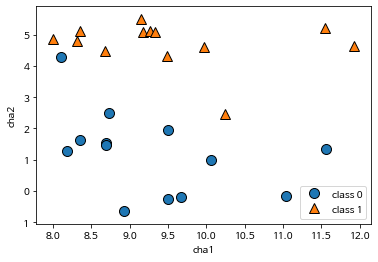

In [ ]:
# 데이터 셋 만들기
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y) 

# y값을 기준으로 특성을 분류함.
# 클래스 1의 경우 특성 2의 값이 주로 5이상일 경우가 많다.
# 클래스는 특성 2와 상관관계에 속한다.
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("cha1")
plt.ylabel("cha2")
print('X.shape:',X.shape)

회귀는 연속적인 숫자 또는 '부동소수점수(실수)'를 예측하는 것이다.
이는 연속되는 출력값을 통해 다음의 값을 예측하는 것이라고 볼 수도 있다.

(40, 1)

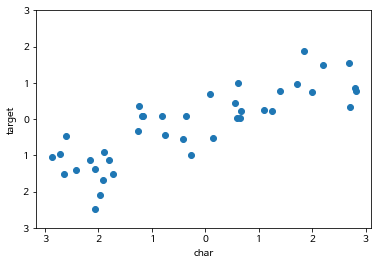

In [ ]:
# 회귀 알고리즘, 저차원 데이터셋 이용
# 회귀 지표란 
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) # 좌표 크기
plt.xlabel("char")
plt.ylabel("target")
X.shape
# 일차함수 모양을 띈다. 이를 이용해 기울기를 측정하여 다음 값의 범위를 추산할 수 있을 것이다.

# 유방암 조직 양성유무 예측하기

In [ ]:
# 유방암, 고차원 데이터셋
# 조직 데이터를 기반으로 종양이 양성인지 음성인지 예측해보자.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()
cancer.data.shape

(569, 30)

In [ ]:
import numpy as np

print("클래스별 샘플 갯수: \n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# cancer.target_names         > ['malignant', 'benign'] 양성 음성
# np.bincount(cancer.target)  > [212, 357]

클래스별 샘플 갯수: 
 {'malignant': 212, 'benign': 357}


In [ ]:
# 특성 이름
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [ ]:
# 특성 확장
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# k-최근접 이웃 분류
- 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

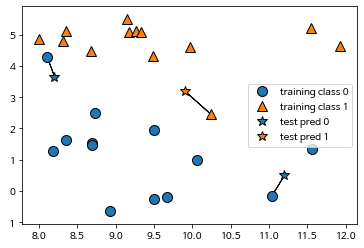

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

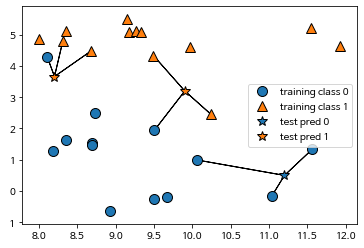

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# train 19개 test 7개 : 총 26개

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 훈련으로 분류모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [ ]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


## KNeighborsClassifier 분석

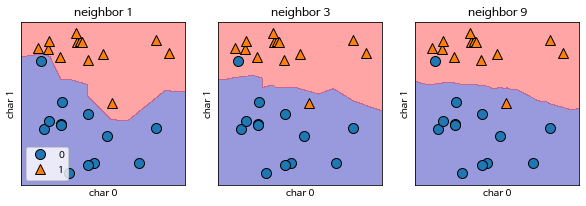

In [ ]:
# 결정경계 이웃이 많을 수록 경계는 단순해지고, 극단의 경우 예측은 모두 같은 값이 된다.

fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메소드는 self 오프젝트를 리턴합니다.
  # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
  
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("neighbor {}".format(n_neighbors))
  ax.set_xlabel("char 0")
  ax.set_ylabel("char 1")
axes[0].legend(loc=3)


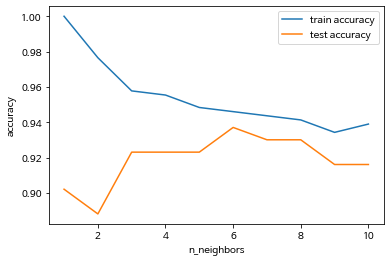

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))
  
  
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## k-최근접 이웃 회귀

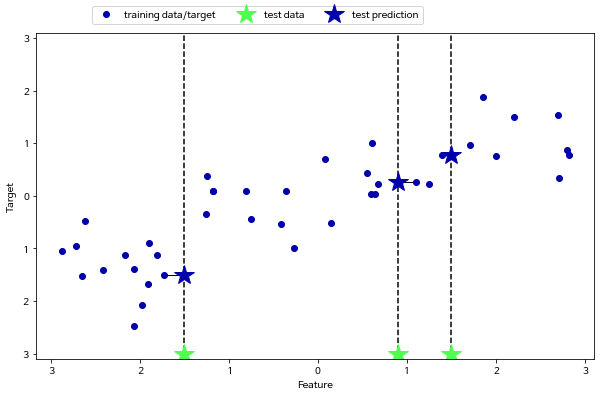

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

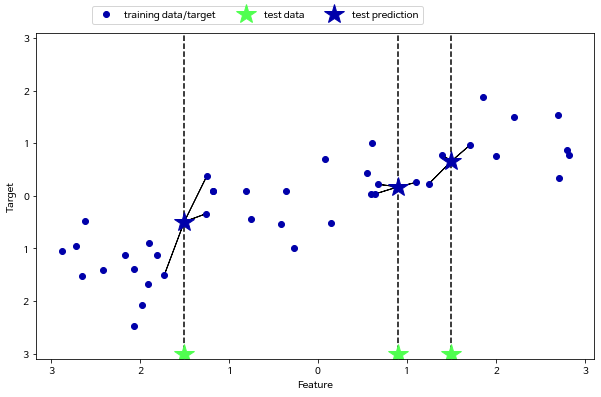

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 이 때 최근접 이웃은, 이웃 간의 평균으로 예측된다

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 셋트로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
reg.predict(X_test) # test에 대한 예측값

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [ ]:
# score 메서드  모델평가
reg.score(X_test, y_test)

0.8344172446249605

## KNeighborsRegressor 분석

1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해보자


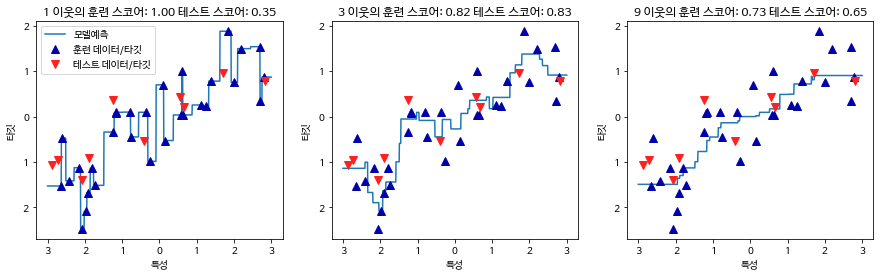

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다

line = np.linspace(-3, 3, 1000).reshape(-1, 1) # reshape(-1, 1) 2차원 배열로 만듦 1열 짜리를  n열 짜리로 만든다.
for n_neighbors, ax in zip([1,3,9], axes):
  
  # 1, 3, 9 이웃을 사용한 예측을 합니다.
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line)) # line 은 -3 ~3 Rkwl
#   ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), marketsize=8)
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # c=mglearn.cm2 는 색깔
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train),
      reg.score(X_test, y_test)))
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")
axes[0].legend(["모델예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")

**요약**:

쉽고 이해하기 쉬워, 복잡한 알고리즘을 적용해보기 이전에 사용함.

*그러나,  k-최근접 이웃 알고리즘이 이해하긴 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다. 이런 단점이 없는 알고리즘이 다음에 설명할 선형 모델이다*

# 선형 모델
선형 모델은 약 100년 전에 개달되었고, 지난 몇 십년 동안 폭넓게 연구되고 현재도 널리 쓰이고 있다.

w[0]: 0.393906  b: -0.031804


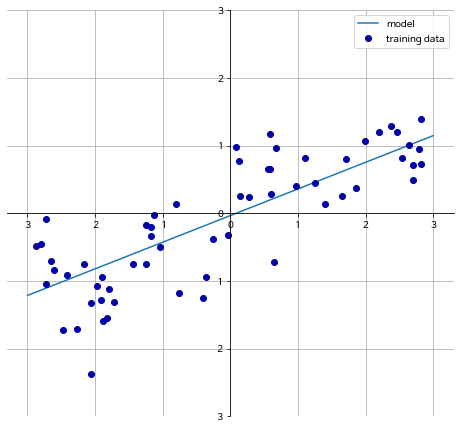

In [48]:
mglearn.plots.plot_linear_regression_wave()

In [51]:
#  선형 모델 만들기

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [53]:
# 기울기와 절편 구하기

print("lr.coef_:", lr.coef_)
print('lr.intercept_', lr.intercept_)
# 사용자가 지정한 매개변수와 구분하기 위해 끝에 '_'를 붙인다.

lr.coef_: [0.39390555]
lr.intercept_ -0.031804343026759746


In [56]:
# 훈련 세트와 테스트 세트의 성능 확인하기

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 과소접합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [58]:
# 복잡한 데이터 셋의 경우는 과대적합이 잘 일어난다. 확인해보자.

# 해당 데이터는 샘플 506개, 특성은 유도된 것을 포함한 104개 이다

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # random_state는 그냥 램덤변수 지정
lr = LinearRegression().fit(X_train, y_train) # 선형회귀


In [59]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 과대적합.. 복잡도를 제어할 수 있는 모델으 사용해야 한다.

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## Ridge 회귀
과대적합이 되지 않도록 규제, 리지 회귀에 사용하는 규제 방식을 L2 규제.
최소적합법에 사용한 것과 같은 예측함수 사용

In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# 테스트 세트 점수가 높다.
# 즉 복잡한 데이터는 LinearRegression보다 Ridge 모델을 사용하자

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [62]:
# 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다.
# 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했다.

# 그렇담 alpha 값을 10으로 할 경우는 어떨까.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [63]:
# alpha 값을 0.1으로 할 경우
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# 낮을 수록 LinearRegression과 비슷해짐 > 과대적합이란 의미
# 0.1 값은 좋은 성적을 냄


훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


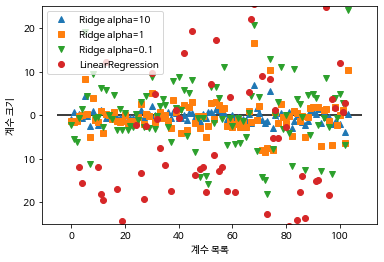

In [64]:
# 높은 alpha 값의 증가는 제약의 증가를 의미하므로, 높은 alpha 값은 coef_의 절댓값 크기(오차값의 범위)가 작을 것 이라고 예상

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-25, 25)
plt.legend()

# 선형 회귀와 몇 가지 alpha 값을 가진 리지 회귀의 계수 크기 비교